In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import detrend
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath 
from hyperellipsoid import hyperellipsoid
from psd import psd
import tkinter as tk
from tkinter import filedialog

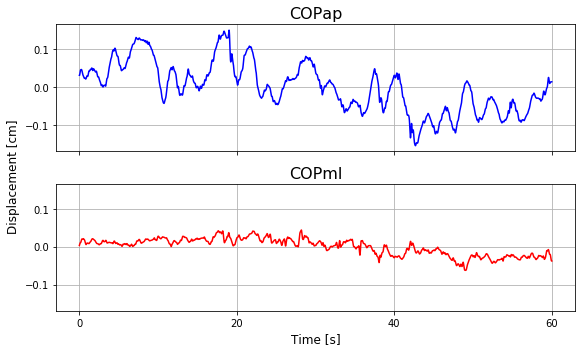

In [2]:
#import pandas as pd  # use Pandas to read data from a website
#fileUrl = 'http://www.udel.edu/biology/rosewc/kaap686/reserve/cop/copdata.txt'
#COP = pd.read_table(fileUrl, skipinitialspace=True, sep=None, engine='python')  # Pandas dataframe
#COP = COP.values / 10  # mm to cm
#COPap = COP[:,0]
#COPml = COP[:,1]
# load data file
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(initialdir='./../data_EP/')
#fx, fy, fz, mx, my, mz = np.loadtxt('./../data_EP/07_06/DSADATA00034.txt', delimiter=',', unpack=True)
fx, fy, fz, mx, my, mz = np.loadtxt(file_path, delimiter=',', unpack=True)
COPap = ((fx + my) / fz) * 10
COPml = ((fy - mx) / fz) * 10
freq = 1000
b, a = butter(4, (5/(freq/2)), btype = 'low')
COPap = filtfilt(b, a, COPap)
COPml = filtfilt(b, a, COPml)
COPap = detrend(COPap, axis=0, type='constant')
COPml = detrend(COPml, axis=0, type='constant')
t = np.linspace(0, COPap.shape[0]/freq, COPap.shape[0])
fig, (ax1,ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (8, 5))
ax1.plot(t, COPap, 'b')
ax1.set_title('COPap', fontsize=16)
ax1.grid()
ax2.plot(t, COPml, 'r')
ax2.set_xlabel('Time [s]', fontsize=12)
ax2.set_title('COPml', fontsize=16)
fig.text(0, 0.5, 'Displacement [cm]', ha='center', va='center',
         rotation='vertical', fontsize=12)
plt.locator_params(axis = 'both', nbins = 4)
ax2.grid()
plt.tight_layout()

In [3]:
def cop_plot(freq, COPap, COPml, units='cm'):
    '''
    Plot COP data from postural sway measurement.
    '''
    import matplotlib.gridspec as gridspec
    t = np.linspace(0, COPap.shape[0]/freq, COPap.shape[0])
    plt.rc('axes', labelsize=16,  titlesize=16)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
    ax1 = plt.subplot(gs[0])
    ax1.plot(t, COPap, lw=2, color=[0, 0, 1, 1], label='ap')
    ax1.plot(t, COPml, lw=2, color=[1, 0, 0, 1], label='ml')
    ax1.set_xlim([t[0], t[-1]])
    ax1.grid()
    ax1.locator_params(axis='both', nbins=5)
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('COP [%s]' %units)
    ax1.set_title('Stabilogram')
    ax1.legend(fontsize=12, loc='best', framealpha=.5)
    ax2 = plt.subplot(gs[1])
    ax2.plot(COPml, COPap, lw=2, color='g')
    ax2.set_xlabel('COP ml [%s]' %units)
    ax2.set_ylabel('COP ap [%s]' %units)
    ax2.set_title('Statokinesigram')
    if 0:  # plot the axes with the same colors of the COP data
        ax2.xaxis.label.set_color('red')
        ax2.spines['bottom'].set_color('red')
        ax2.tick_params(axis='x', colors='red')
        ax2.yaxis.label.set_color('blue')
        ax2.spines['left'].set_color('blue')
        ax2.tick_params(axis='y', colors='blue')
    ax2.grid()
    ax2.locator_params(axis='both', nbins=5)
    plt.tight_layout()
    plt.show()

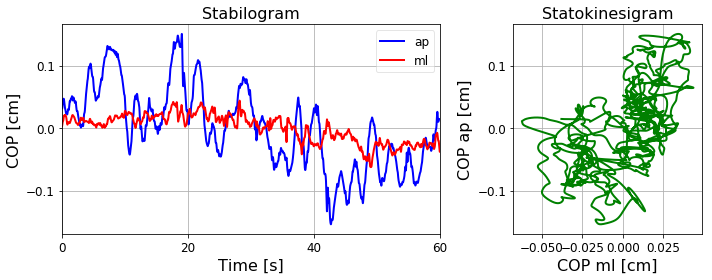

In [4]:
# plot data
cop_plot(freq, COPap, COPml)

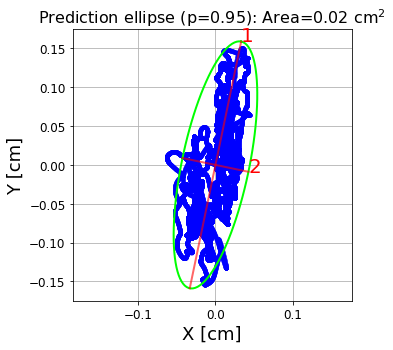

Area = 0.022118948539760395
Semi-axes = [0.16229874 0.04338099]
Angles = [ 78.22896557 -11.77103443]
Center = [1.11054684e-16 8.68009368e-18]
Rotation matrix =
 [[ 0.20400116  0.97897065]
 [ 0.97897065 -0.20400116]]


In [5]:
area, axes, angles, center, R = hyperellipsoid(COPml, COPap, units='cm', show=True)
print('Area =', area)
print('Semi-axes =', axes)
print('Angles =', angles)
print('Center =', center)
print('Rotation matrix =\n', R)

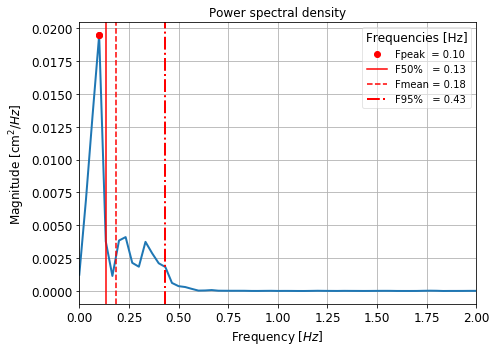

In [6]:
fp_ap, mf_ap, fmax_ap, Ptot_ap, F, P_ap = psd(COPap, fs=freq, scales='linear', xlim=[0, 2], units='cm')

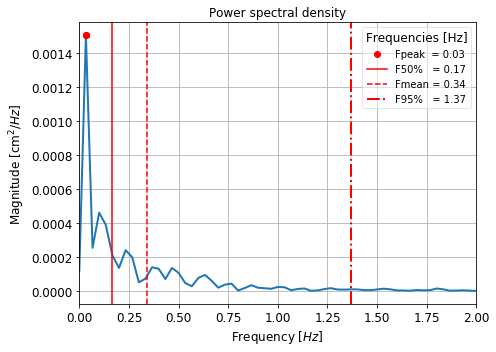

In [7]:
fp_ml, mf_ml, fmax_ml, Ptot_ml, F, P_ml = psd(COPml, fs=freq, xlim=[0, 2], units='cm')